<h3 align="center">Skill 1</h3> <h4 align = "right">07/07/2021</h4>



#### Name: Suryajiraje Bhosale 
#### PRN: 1901202051
#### School: Data Science 
#### Program: Data Science 
#### Year/ Semester: 2/4
#### Subject Name: Machine Learning
#### Subject Code: DS401
#### Title: Classification Models

#### Skills/Competencies to be acquired:

1. Model selection
2. Model application

#### Duration of activity: 1 Hours

#### 1. What is the purpose of this activity?

The purpose of this activity is to inspect which classification model will best fit the dataset.

#### 2. Steps performed in this activity.

1. Import libraries 
2. Import Dataset
3. Basic EDA
4. Logistic Regression Modelling 
5. KNN
6. Naive Bayes

#### 3. What resources / materials / equipment / tools did you use for this activity?

1. Python IDE
2. Data Set
3. Internet
4. Notes


#### 4. What skills did you acquire?

Model Selection, Adequacy, Application

#### 5. Time taken to complete the activity?

1 Hour


In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings as w
w.filterwarnings('ignore')
from sklearn.metrics import classification_report

In [19]:
df = pd.read_csv('/Users/user/Desktop/DB.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Generating a pairplot with classing on target variable to assess the priliminary characteristics of data:

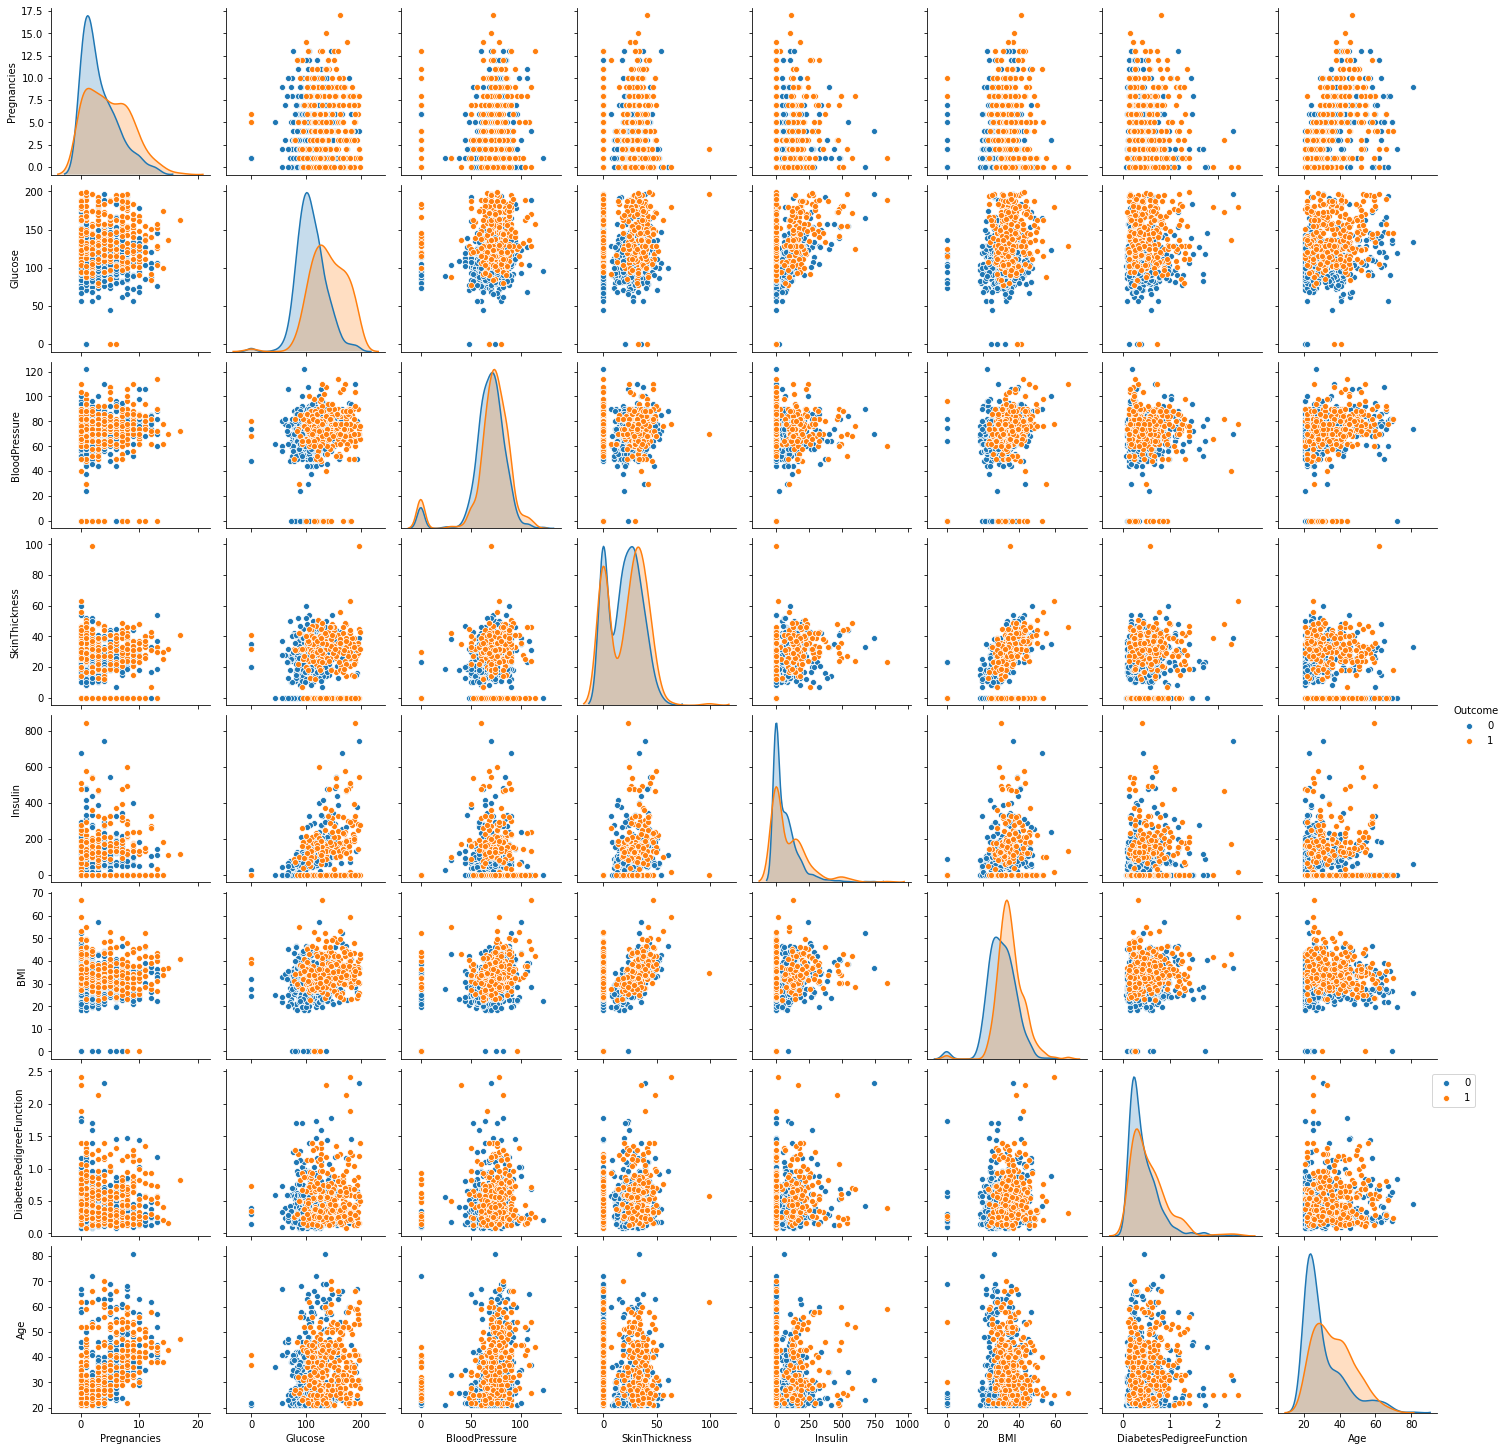

In [107]:
sns.pairplot(df, hue='Outcome')
plt.legend(loc='upper center', bbox_to_anchor=(1.10, 1.0), ncol=1)
plt.show()

#### Heatmap to check existence of any missing values in the dataset:

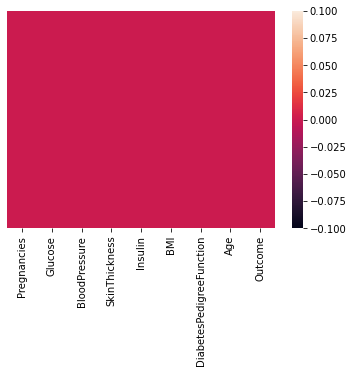

In [174]:
df.replace(['?','-'], np.nan)
sns.heatmap(df.isnull(), yticklabels=False);

#### Applying a counter to count the frequency of each classification in the dataset:

In [68]:
from collections import Counter
print(Counter(y))

Counter({0: 500, 1: 268})


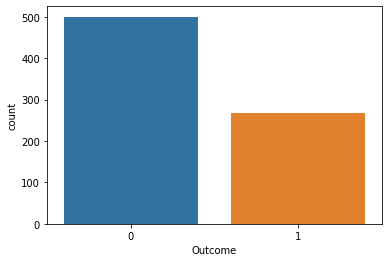

In [114]:
sns.countplot(df.Outcome);

#### Removing outliers from the dataset:

In [185]:
from scipy import stats
colnames = df.columns
zscore = np.abs(stats.zscore(df[colnames]))
print("The Z-score of the data is : \n ", zscore)
outlierlist = np.where((zscore >3))

The Z-score of the data is : 
  [[0.63994726 0.84832379 0.14964075 ... 0.46849198 1.4259954  1.36589591]
 [0.84488505 1.12339636 0.16054575 ... 0.36506078 0.19067191 0.73212021]
 [1.23388019 1.94372388 0.26394125 ... 0.60439732 0.10558415 1.36589591]
 ...
 [0.3429808  0.00330087 0.14964075 ... 0.68519336 0.27575966 0.73212021]
 [0.84488505 0.1597866  0.47073225 ... 0.37110101 1.17073215 1.36589591]
 [0.84488505 0.8730192  0.04624525 ... 0.47378505 0.87137393 0.73212021]]


In [189]:
print("The indexes if outliers is : \n ", outlierlist[0], '\n')
print("The number of outliers is : \n ", len(outlierlist[0]))

The indexes if outliers is : 
  [  4   7   8   9  13  15  45  49  49  58  60  60  75  78  81  81  88 111
 123 145 153 159 172 177 182 186 193 220 222 228 228 247 261 266 269 286
 298 300 330 332 336 342 347 349 357 370 370 371 371 395 409 415 426 426
 430 435 445 445 453 453 455 459 468 484 486 494 494 502 522 522 533 535
 579 584 589 593 601 604 619 621 643 645 655 666 673 684 684 695 697 703
 706 706 753] 

The number of outliers is : 
  93


In [190]:
df = df.drop(outlierlist[0],axis=0)
print("Dimension of the dataset after removing the outliers : ", df.shape)

Dimension of the dataset after removing the outliers :  (688, 9)


#### Splitting the data into explanatory and explained variables. All variables except Outcome are explanatory variables, whereas Outcome is the target or explained variable:

In [191]:
X = df.drop('Outcome', 1)
y = df.Outcome

#### Implementing a train test split for target and explanatory variables. This was succeeded by generating a LogisticRegression model which was trained on the training values of the dataset. Post training the model was used to predict the data from the test sub-dataset. This prediction was later used to develop an evaluation metric. These metrics were generated via score method and classification report. 

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(481, 8)
(207, 8)
(481,)
(207,)


## Logistic Regression:

In [225]:
logreg = LogisticRegression(C = 10)
logreg.fit(X_train, y_train)
y_hat = logreg.predict(X_test)

In [226]:
print('The score on the training set for LogReg is: {:.4}'.format(logreg.score(X_train,y_train)))
print('The score on the test set for LogReg is: {:.4f}'.format(logreg.score(X_test,y_test)))

The score on the training set for LogReg is: 0.7921
The score on the test set for LogReg is: 0.7729


In [227]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       141
           1       0.66      0.61      0.63        66

    accuracy                           0.77       207
   macro avg       0.74      0.73      0.73       207
weighted avg       0.77      0.77      0.77       207



## KNN:

#### Below we have written two blocks of code to generate a classification system using the KNN model. Firstly we have created a list called err_en_ which holds the error rates generated by the model that correspond to the given number of neighbours. We then use the min function to extract the number of neighbours with minimum error rate. This number happens to be 13.

#### This is graphically depicted using a plot.

In [228]:
error_rate = []
for i in range(1,40):
 
 knn1 = KNeighborsClassifier(n_neighbors=i)
 knn1.fit(X_train,y_train)
 pred_i = knn1.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

err_en_= []
for ele in enumerate(error_rate, 1):
    err_en_.append(ele)
    
min(err_en_, key = lambda x: x[1])

(13, 0.2222222222222222)

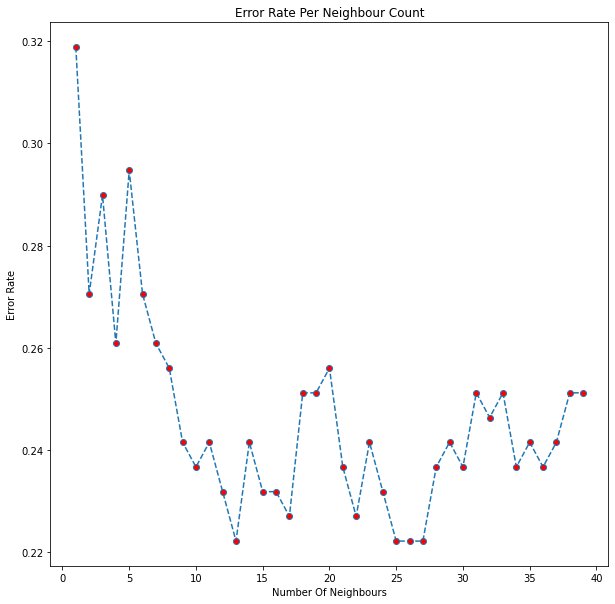

In [229]:
plt.figure(figsize=(10,10))
plt.plot(range(1,40), error_rate, marker = 'o', linestyle = 'dashed', markerfacecolor = 'red')
plt.title('Error Rate Per Neighbour Count')
plt.ylabel('Error Rate')
plt.xlabel('Number Of Neighbours');

In [230]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [231]:
print('The score on the training set for KNN is: {:.4}'.format(knn.score(X_train, y_train)))
print('The score on the test set for KNN is: {:.4}'.format(knn.score(X_test, y_test)))

The score on the training set for KNN is: 0.79
The score on the test set for KNN is: 0.7778


In [232]:
y_hat2 = knn.predict(X_test)
print(classification_report(y_test, y_hat2))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       141
           1       0.69      0.55      0.61        66

    accuracy                           0.78       207
   macro avg       0.75      0.72      0.73       207
weighted avg       0.77      0.78      0.77       207



## Naive Bayes:

In [233]:
from sklearn.naive_bayes import GaussianNB
nbg = GaussianNB()
nbg.fit(X_train, y_train)
print('The score for training set using NB is: {:.4f}'.format(nbg.score(X_train, y_train)))
print('The score for test set using NB is: {:.4f} \n'.format(nbg.score(X_test, y_test)))
y_hat3 = nbg.predict(X_test)
print(classification_report(y_test, y_hat3))

The score for training set using NB is: 0.7609
The score for test set using NB is: 0.7536 

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       141
           1       0.60      0.70      0.64        66

    accuracy                           0.75       207
   macro avg       0.72      0.74      0.73       207
weighted avg       0.77      0.75      0.76       207



## Conclusion:

#### We have used 3 models for the classification purpose Logistic Regression, KNN, and Naive Bayes. The scores of the all are given below for evaluation of the best model:

The score on the training set for LogReg is: 0.7821


The score on the training set for KNN is: 0.8082


The score for training set using NB is: 0.7672


The score on the test set for LogReg is: 0.7446


The score on the test set for KNN is: 0.7186


The score for test set using NB is: 0.7229

#### We can also see from the classification report for all state a poor performance when classifying 1s. This could also be due to 1s being almost half in number as 0s when training the model.